<h2><center>Random Walk - Pro India Data Science Level-2 Assessment<center></h2>

<h3>Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it</h3>

In [2]:
import pandas as pd

#loading the dataset
df = pd.read_csv('dataset.csv')
missing_data = df.isnull().sum()
print("Missing data count:\n", missing_data)

#replacing the null values of the numerical columns using mean
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

#replacing the ordinal column null values by mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

#droping the duplicates
df.drop_duplicates(inplace=True)
df.info()

Missing data count:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<h3>Q2: What is the average body mass for Gentoo penguins?</h3>

In [3]:
gentoo_penguins = df[df['species'] == 'Gentoo']
average_body_mass = gentoo_penguins['body_mass_g'].mean()
print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass:.2f} grams")

The average body_mass_g for Gentoo penguins is: 5126.81 grams


<h3>Q3: Distribution Analysis: Skewness and Kurtosis</h3>

In [12]:
from scipy.stats import skew, kurtosis
import pandas as pd

def calculate_skewness_kurtosis(data):
    return skew(data), kurtosis(data, fisher=False)

def skewness_type(skew):
    if skew > 0:
        return 'Right Skewed'
    elif skew < 0:
        return 'Left Skewed'
    else:
        return 'Symmetrical'

def kurtosis_type(kurt):
    if kurt > 3:
        return 'Leptokurtic'
    elif kurt < 3:
        return 'Platykurtic'
    else:
        return 'Mesokurtic'

species_list = df['species'].unique()

summary_stats_list = []

for species in species_list:
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        if len(species_data) > 1:
            #determining skewness and kurtosis
            skewness_value, kurtosis_value = calculate_skewness_kurtosis(species_data)

            # determining skewness and kurtosis types
            skew_type = skewness_type(skewness_value)
            kurt_type = kurtosis_type(kurtosis_value)

            summary_stats_list.append({
                'Species': species,
                'Feature': feature,
                'Skewness': skewness_value,
                'Kurtosis': kurtosis_value,
                'Skewness Type': skew_type,
                'Kurtosis Type': kurt_type
            })
            
summary_stats = pd.DataFrame(summary_stats_list)

print(summary_stats)


     Species         Feature  Skewness  Kurtosis Skewness Type  \
0     Adelie  bill_length_mm  0.162533  2.771896  Right Skewed   
1     Adelie   bill_depth_mm  0.329209  2.898928  Right Skewed   
2     Gentoo  bill_length_mm  0.712323  4.147647  Right Skewed   
3     Gentoo   bill_depth_mm  0.334623  2.388874  Right Skewed   
4  Chinstrap  bill_length_mm -0.095936  2.875989   Left Skewed   
5  Chinstrap   bill_depth_mm  0.006726  2.101260  Right Skewed   

               Kurtosis Type  
0  Platykurtic (Light Tails)  
1  Platykurtic (Light Tails)  
2  Leptokurtic (Heavy Tails)  
3  Platykurtic (Light Tails)  
4  Platykurtic (Light Tails)  
5  Platykurtic (Light Tails)  


<h3>Q4: Detect and Visualize Outliers</h3>

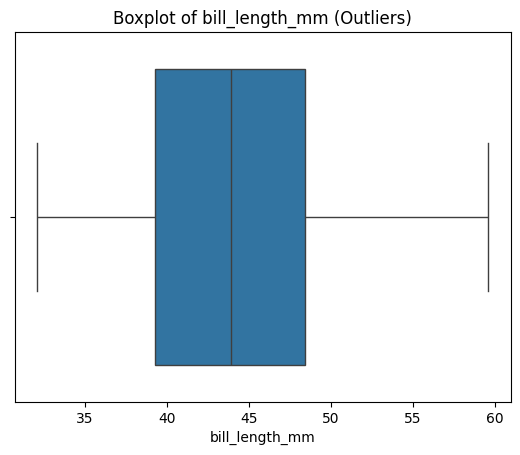

Outliers in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


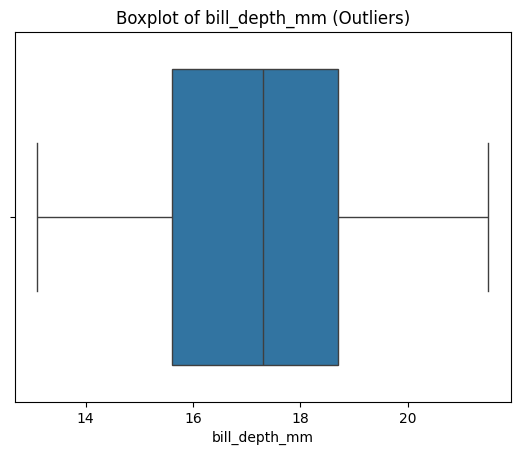

Outliers in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


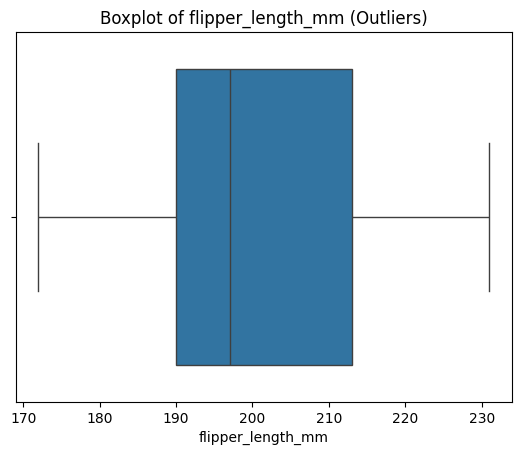

Outliers in flipper_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


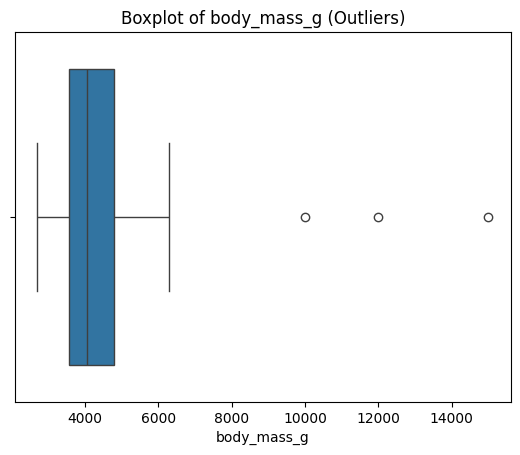

Outliers in body_mass_g:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, column):
    #using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Visualize outliers and detect them for each column
for column in columns:
    # Visualize outliers using box plot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (Outliers)')
    plt.show()
    
    # Detect and print outliers
    outliers = detect_outliers(df, column)
    print(f"Outliers in {column}:\n", outliers)


<h3>Q5: Dimensionality Reduction</h3>

     Principal Component 1  Principal Component 2  Principal Component 3  \
0            -1.826395e+00           1.329330e-01           3.918734e-01   
1            -1.280662e+00          -3.734830e-01           2.581225e-01   
2            -1.202863e+00          -1.906579e-01          -2.588396e-01   
3             7.527563e-16          -3.555026e-16           1.120202e-16   
4            -1.796753e+00           4.697583e-02           3.654760e-01   
..                     ...                    ...                    ...   
339           6.313206e-01           2.182712e+00          -1.323089e+00   
340          -5.781250e-01           1.709557e-01          -5.380169e-01   
341          -2.680909e-01           9.134819e-01          -8.240597e-01   
342           5.270864e-01           1.375345e+00          -8.051279e-01   
343          -1.111132e-01           1.163257e+00          -8.959041e-01   

     Principal Component 4    species  
0            -3.694396e-01     Adelie  
1      

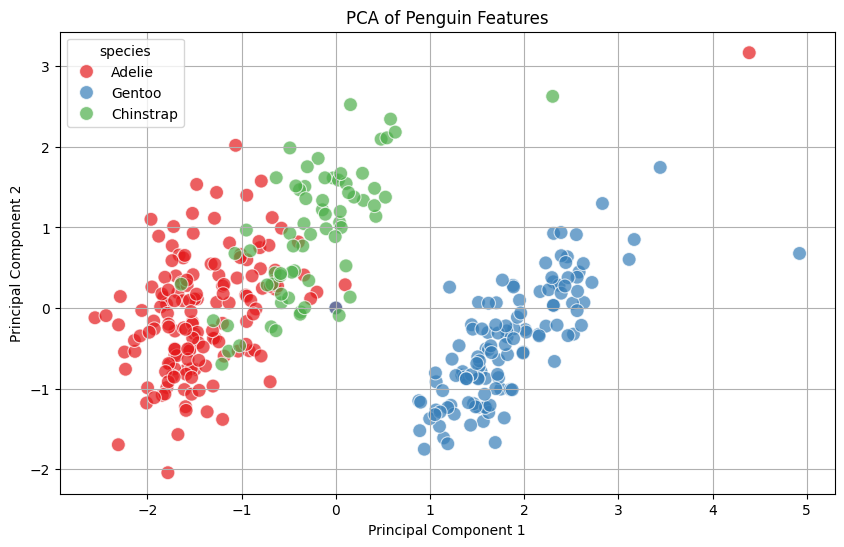

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'Principal Component {i+1}' for i in range(len(features))])
pca_df['species'] = df.loc[X.index, 'species'].values
print(pca_df)
# Visualize the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='species', 
                palette='Set1', s=100, alpha=0.7)
plt.title('PCA of Penguin Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


<h3>Q6: visualization of bill_length_mm vs bill_depth_mm</h3>

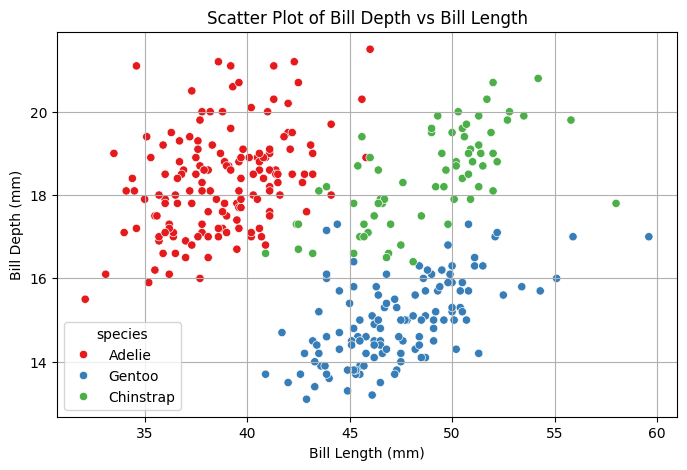

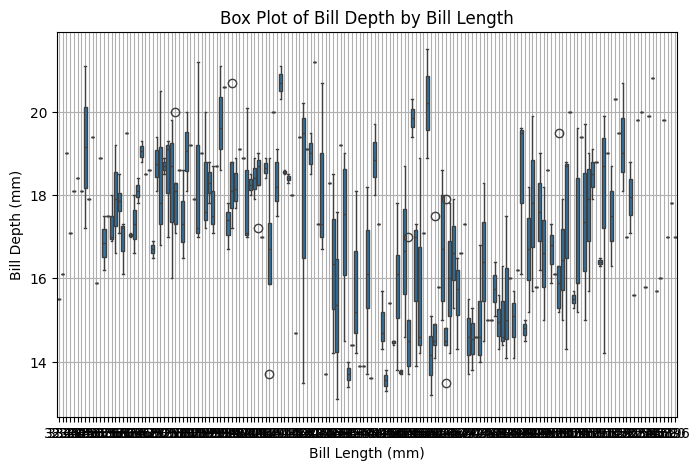

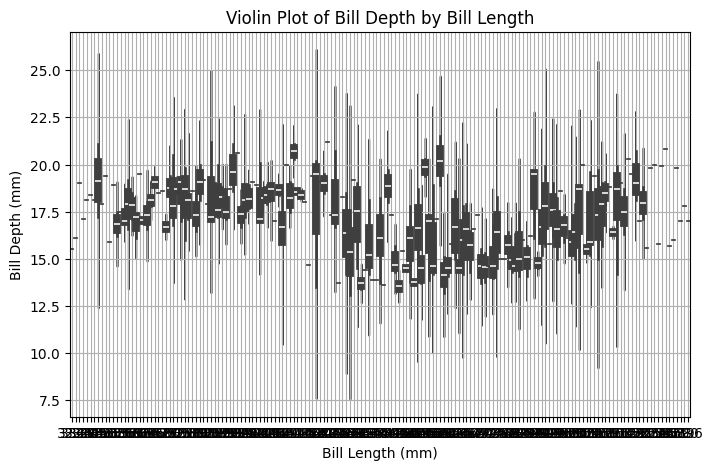

<Figure size 800x500 with 0 Axes>

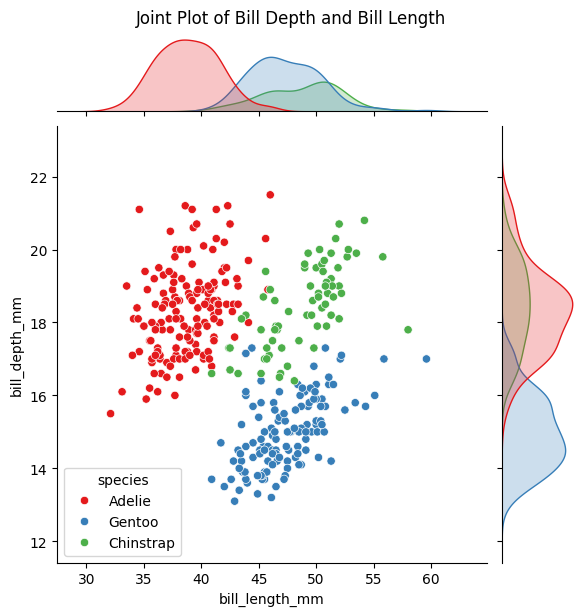

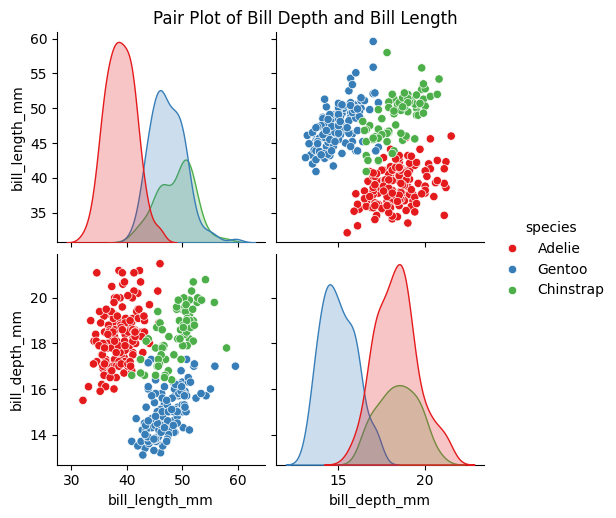

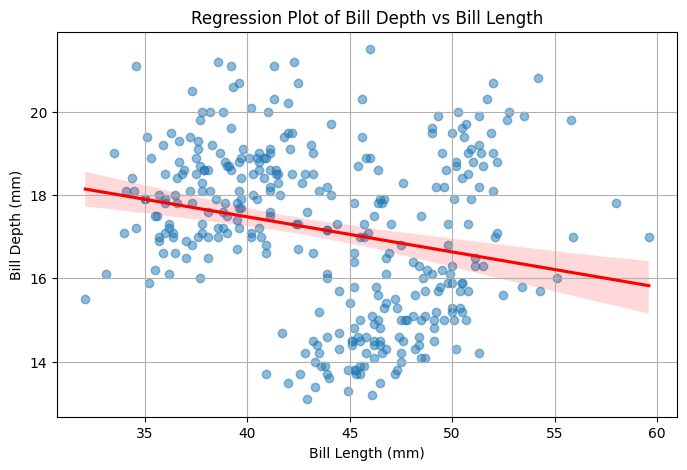

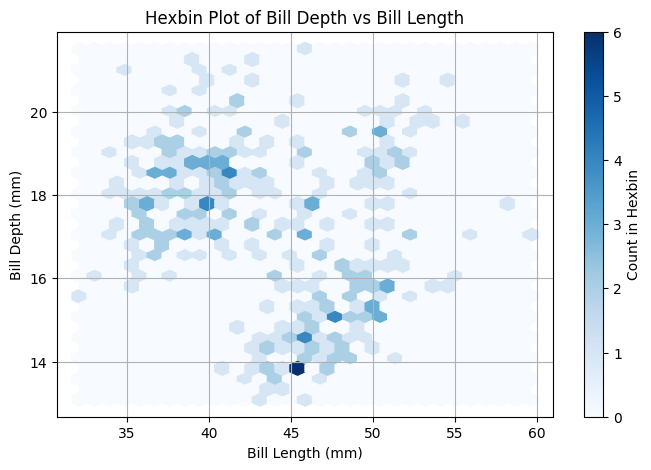

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', palette='Set1')
plt.title('Scatter Plot of Bill Depth vs Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

# 2. Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='bill_length_mm', y='bill_depth_mm', data=df)
plt.title('Box Plot of Bill Depth by Bill Length')
plt.ylabel('Bill Depth (mm)')
plt.xlabel('Bill Length (mm)')
plt.grid()
plt.show()

# 3. Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='bill_length_mm', y='bill_depth_mm', data=df)
plt.title('Violin Plot of Bill Depth by Bill Length')
plt.ylabel('Bill Depth (mm)')
plt.xlabel('Bill Length (mm)')
plt.grid()
plt.show()

# 4. Joint Plot
plt.figure(figsize=(8, 5))
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', kind='scatter', palette='Set1')
plt.suptitle('Joint Plot of Bill Depth and Bill Length', y=1.02)
plt.show()

# 5. Pair Plot
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm'], hue='species', palette='Set1')
plt.suptitle('Pair Plot of Bill Depth and Bill Length', y=1.02)
plt.show()

# 6. Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot of Bill Depth vs Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()

# 7. Hexbin Plot
plt.figure(figsize=(8, 5))
plt.hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Hexbin')
plt.title('Hexbin Plot of Bill Depth vs Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid()
plt.show()


<h3>Q7: maximum flipper_length_mm for each combination of species and island and species with longest flippers</h3>

In [26]:
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print(max_flipper_length)

longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
print("Species with the longest flippers on each island:\n", longest_flippers)

     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0
Species with the longest flippers on each island:
      species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


<h3>Q8: z-score normalization</h3>

In [14]:
from scipy.stats import zscore

df_normalized = df_cleaned.copy()
features_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_normalized[features_to_normalize] = df_cleaned[features_to_normalize].apply(zscore)

print(df_normalized.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.873115       0.768343          -1.415643   
1  Adelie  Torgersen       -0.800309       0.104774          -1.056111   
2  Adelie  Torgersen       -0.654696       0.411037          -0.408954   
4  Adelie  Torgersen       -1.309955       1.074606          -0.552767   
5  Adelie  Torgersen       -0.836712       1.738175          -0.768486   

   body_mass_g     sex  
0    -0.459514    male  
1    -0.415366  female  
2    -0.900986  female  
4    -0.724397  female  
5    -0.547808    male  
